---
title: "Analysis Report"
date: "{% now 'local', '%Y-%m-%d %H:%M:%S' %}"
---


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [9]:
# Lees de CSV in een pandas DataFrame

data = pd.read_csv('pricesall.csv')
data['Date'] = pd.to_datetime(data['Date'])

## Grafiek van Gemiddelde Prijzen per Uur

Deze grafiek toont het gemiddelde van de elektriciteitsprijzen per uur over een bepaalde periode. De x-as vertegenwoordigt de uren van de dag, terwijl de y-as de gemiddelde prijzen weergeeft.

De grafiek biedt inzicht in hoe de prijzen variëren gedurende verschillende uren van de dag. Op basis van de lijn in de grafiek kunnen we patronen herkennen, zoals pieken en dalen in de prijzen. Het is duidelijk dat het tarief tijdens bepaalde uren hoger is dan tijdens andere uren.

Dit inzicht kan nuttig zijn bij het nemen van beslissingen over elektriciteitsgebruik, bijvoorbeeld door energie-intensieve taken te plannen tijdens uren met lagere prijzen.

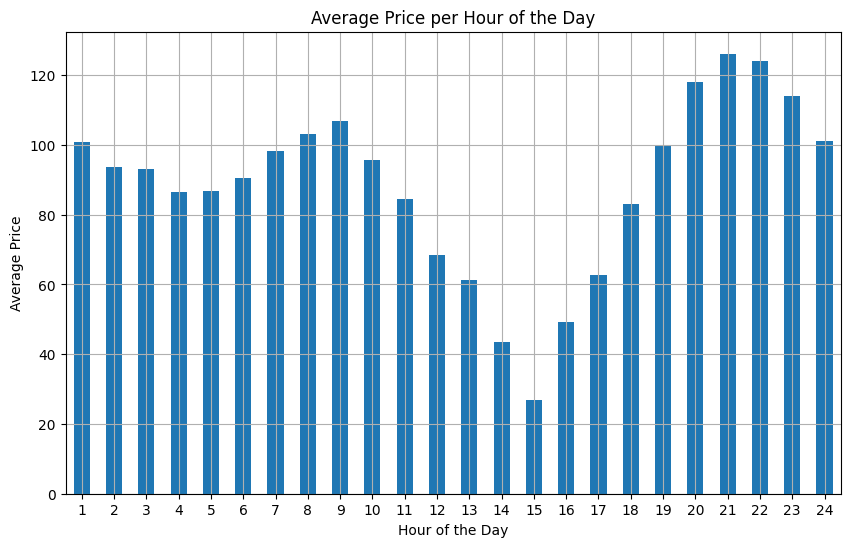

In [10]:
#Average Price per Hour of the Day
hourly_avg = data.groupby('Hour')['Price'].mean()

# Plot the average price per hour
plt.figure(figsize=(10, 6))
hourly_avg.plot(kind='bar')
plt.title('Average Price per Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Price')
plt.grid(True)
plt.xticks(rotation=0)
plt.show()

## Grafiek van Prijsverdeling

Deze grafiek toont de verdeling van de elektriciteitsprijzen. De x-as vertegenwoordigt de prijsniveaus en de y-as geeft de frequentie weer van hoe vaak een bepaalde prijs voorkomt.

De grafiek is opgebouwd uit histogramstaven die de frequentie van prijsklassen weergeven. De breedte van de staven vertegenwoordigt een bepaald prijsbereik, en de hoogte van de staven geeft aan hoe vaak prijzen in dat bereik voorkomen.

De grafiek kan ons inzicht geven in de verspreiding van prijzen en eventuele kenmerkende prijsklassen. Bijvoorbeeld, als de grafiek een duidelijke piek vertoont rond een bepaalde prijs, kan dit duiden op een veelvoorkomend tariefniveau.

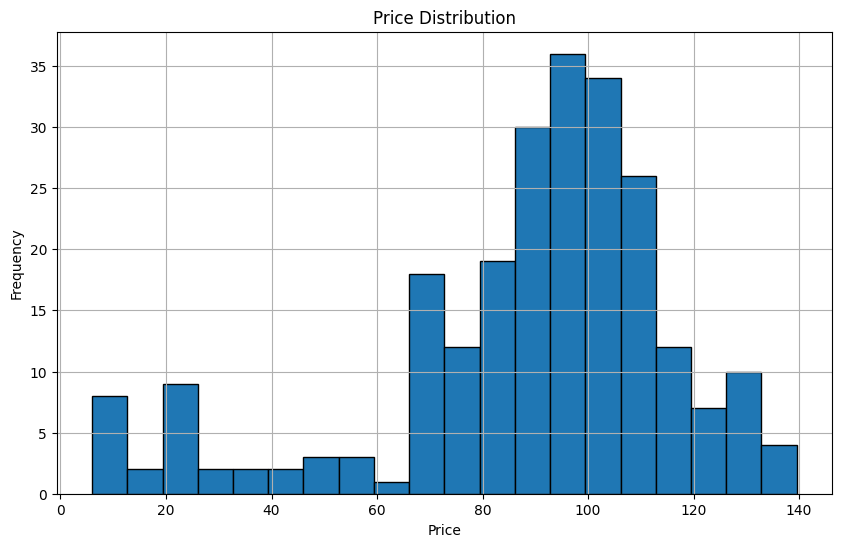

In [11]:
# Price Distribution
plt.figure(figsize=(10, 6))
plt.hist(data['Price'], bins=20, edgecolor='k')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Heatmap van Prijzen op Basis van Dag van de Week en Uur van de Dag

Deze heatmap toont een visuele representatie van de prijzen op basis van de dag van de week en het uur van de dag. De x-as vertegenwoordigt de uren van de dag, terwijl de y-as de dagen van de week weergeeft.

De kleurschaal in de heatmap geeft de prijzen weer, waarbij donkerdere kleuren duiden op hogere prijzen en lichtere kleuren duiden op lagere prijzen.

Het patroon in de heatmap kan inzicht verschaffen in hoe de prijzen variëren over verschillende dagen en uren. Het kan helpen bij het identificeren van specifieke tijdsperioden waarin de prijzen consistent hoger of lager zijn.

De dagen van de week zijn opnieuw gerangschikt om de juiste volgorde in de heatmap weer te geven, beginnend met maandag en eindigend met zondag.


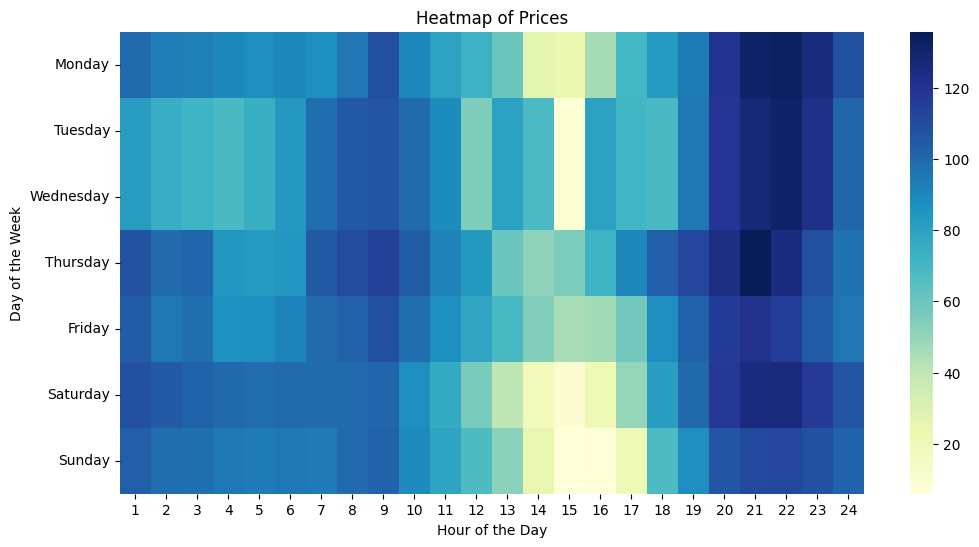

In [12]:
data['DayOfWeek'] = data['Date'].dt.day_name()

# Create a pivot table for the heatmap
heatmap_data = data.pivot_table(values='Price', index='DayOfWeek', columns='Hour')

# Reorder the days of the week for correct heatmap ordering
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(days_order)

# Plot the heatmap of prices
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.title('Heatmap of Prices')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.show()


## Voorspelling van Prijzen met Polynomial Regression

Deze grafiek toont de voorspelling van elektriciteitsprijzen voor de volgende dag met behulp van polynomial regression. Polynomial regression is een techniek waarbij we een polynomiale functie gebruiken om het verband tussen de uren van de dag en de prijzen te modelleren.

De rode lijn in de grafiek vertegenwoordigt de voorspelde prijzen voor elk uur van de volgende dag op basis van de polynomial regression.


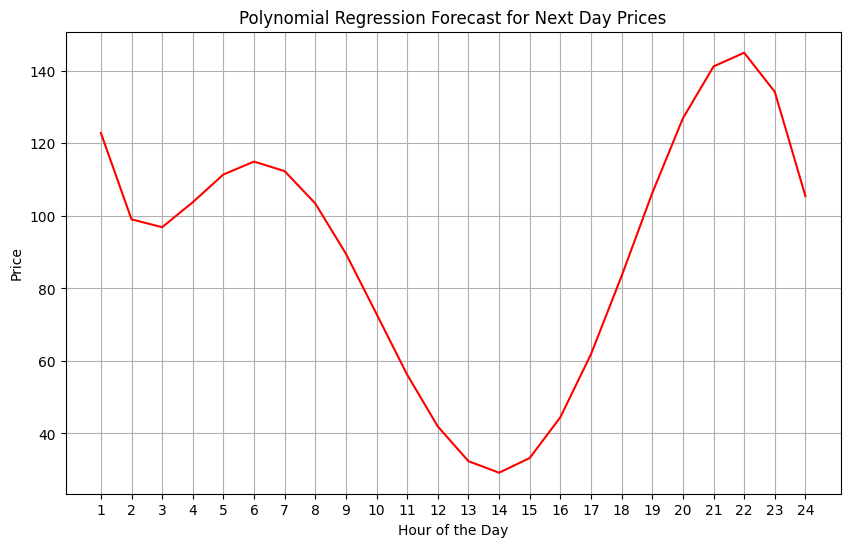

In [13]:
from sklearn.preprocessing import PolynomialFeatures
# Filter data for the next day (assuming the last day in the dataset)
next_day_data = data[data['Date'].dt.date == data['Date'].dt.date.iloc[-1]]

# Create an array of hours (1 to 24) for training
hours = np.arange(1, 25).reshape(-1, 1)

# Prepare features (polynomial hours) and target (prices)
poly = PolynomialFeatures(degree=6)  # Choose the degree of the polynomial
X_train_poly = poly.fit_transform(hours)
y_train = next_day_data['Price']

# Initialize and train the linear regression model with polynomial features
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Forecast prices for each hour of the next day using polynomial features
forecast_poly = model.predict(poly.transform(hours))

# Plot the forecasted values with hours on the x-axis
plt.figure(figsize=(10, 6))
plt.plot(range(1, 25), forecast_poly, color='red', label='Forecasted Values')
plt.title('Polynomial Regression Forecast for Next Day Prices')
plt.xlabel('Hour of the Day')
plt.ylabel('Price')
plt.xticks(range(1, 25))  # Set x-axis ticks to represent hours
plt.grid(True)
plt.show()